# Naive Bayes Classifiers


$ p(c|x) = \frac{p(x|c)p(c)}{p(x)}$

- $p(c|x)$ : posterior
- $p(x|c)$ : likelihood
- $p(c)$ : prior
- $p(x)$ : evidence (constant: can be cancelled out)

## assumptions
each feature makes
- independent
- equal (same weight, feature importance)

contribution to the outcome

- joint probability model

$p(c_k|x_1, ..., x_n) = \frac{p(x_1|c_k)p(x_2|c_k)\dots p(x_n|c_k)p(c_k)}{p(x_1)p(x_2)\dots p(x_n)} \\ = \frac{p(c_k)\Pi_{i=1}^n p(x_i|c_k)}{p(x_1)p(x_2)\dots p(x_n)} \\ \propto p(c_k)\Pi_{i=1}^n p(x_i|c_k)$

$\rightarrow$ find the class k with maximum probability

: $c_k = \text{argmax}_{c_k} p(c_k)\Pi_{i=1}^n p(x_i|c_k)$

### Smoothing
$p(x_i|c_k) = \frac{\text{number of elements in class }c_k \text{ that satisfies }x_i}{\text{number of elements in class } c_k}$
- 이 때, training data를 기준으로 조건 (class $c_k$에 속하면서 조건 $x_i$ 만족)을 만족하는 표본이 없으면, 무조건 $p(x_i|c_k)=0$ 이 되어버림: 따라서 분자가 0이 되는 것을 방지하기 위해서 smoothing을 해준다

$p(x_i|c_k) = \frac{|c_k \text{ & } x_i|}{|c_k|} \rightarrow \frac{|c_k \text{ & } x_i| + \alpha}{|c_k| + n\alpha}$

- $\alpha$ = 0.5 또는 1을 주로 사용, 1일 때 Laplace smoothing, 1보다 작을 때 Lidstone smoothing이라고 한다.
- class $c_k$에 속하는 $n\alpha$개의 샘플이 더 있고, 그 중에 $\alpha$개는 $x_i$를 만족, 나머지 $(n-1)\alpha$개는 만족하지 않는다고 가정 ($x_1, \dots, x_n$까지 있으므로 uniform한 노이즈 가정)

### underflow 방지
- 확률의 곱셈을 계속해서 하다 보면 컴퓨터가 계산할 수 있는 것보다 작아질 수 있음 (underflow): exp, log 통해 해결


## pros and cons
#### 장점
- 쉽고 빠름
- independence assumption이 적용될 때 다른 모델보다 성능이 뛰어남
- 수치형보다 범주형 데이터에 있어서 성능이 더 좋음

#### 단점
- "zero frequency": training set에는 없는 단어가 test set에만 등장했을 때, 확률이 0이 되어버림
- smoothing으로 해결 가능
- 사실상 실생활 데이터에서 independence assumption을 만족하는 경우는 거의 없음

## various NB classifiers
- Gaussian Naive Bayes Classifier: for continuous data, assuming normal distribution
- Multinomial Naive Bayes Classifier: when feature vectors are multinomial
- Bernoulli Naive Bayes Classifier: multivariate event model, 카테고리가 여러 개인 feature의 각 카테고리를 binary로 만들어서 계산
- Categorical Naive Bayes Classifier: Naive Bayes classifier for categorical features
- Complement Naive Bayes Classifier: The Complement Naive Bayes classifier described in Rennie et al. imbalanced dataset에 특히 좋음, 각 클래스의 complement를 이용해서 모델의 weight 계산, text classification에 효과가 좋음

In [13]:
import numpy as np
from sklearn import naive_bayes

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

clf = naive_bayes.GaussianNB()
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

print(clf.predict([[0.8, 1]]))

clf_pf = naive_bayes.GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

print(clf_pf.predict([[-0.8, -1]]))

[1]
[2]
[1]


In [4]:
# load the iris dataset 
from sklearn.datasets import load_iris 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn import naive_bayes

iris = load_iris() 

# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 

# splitting X and y into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

In [5]:
# training the model on training set  
gnb = naive_bayes.GaussianNB() 
gnb.fit(X_train, y_train) 

# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

# comparing actual response values (y_test) with predicted response values (y_pred) 

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


In [6]:
cnb = naive_bayes.CategoricalNB()
cnb.fit(X_train, y_train)

y_pred = cnb.predict(X_test)
print("Categorical Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Categorical Naive Bayes model accuracy(in %): 96.66666666666667


In [7]:
mnb = naive_bayes.MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Multinomial Naive Bayes model accuracy(in %): 93.33333333333333


In [8]:
cmp = naive_bayes.ComplementNB()
cmp.fit(X_train, y_train)

y_pred = cmp.predict(X_test)
print("Complement Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Complement Naive Bayes model accuracy(in %): 65.0


In [9]:
bnb = naive_bayes.BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy(in %): 31.666666666666664


In [10]:
from IPython.display import Image

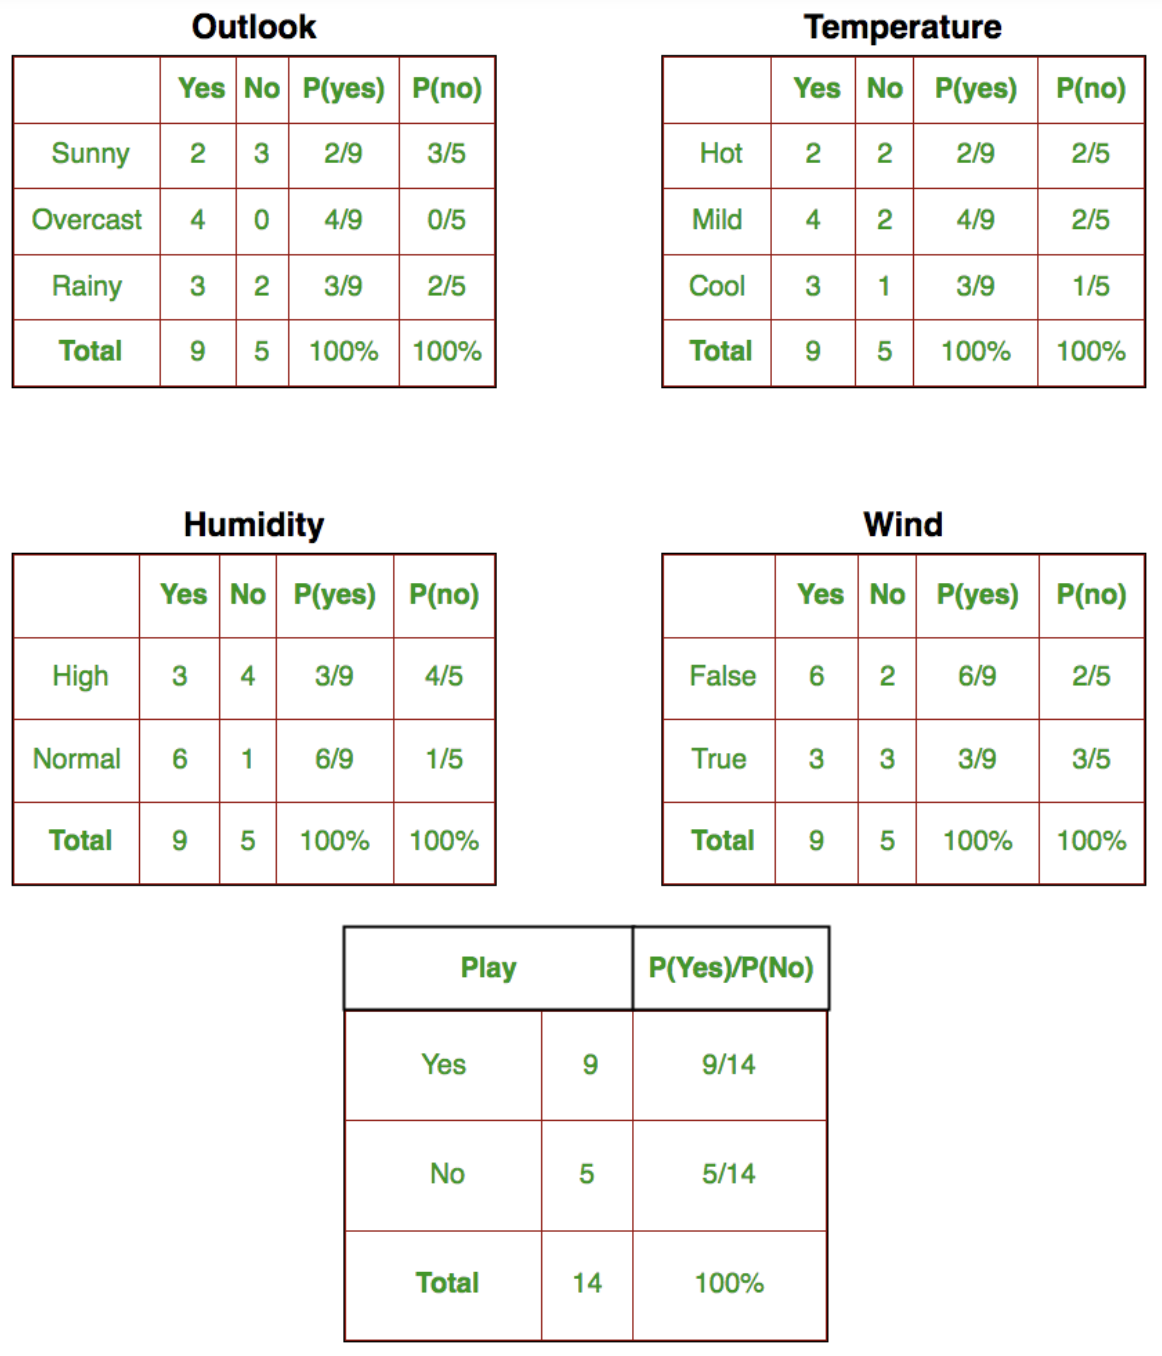

In [11]:
Image(filename='tables.png', width=500)

remind: $p(c_k|x_1, \dots, x_n) = \frac{p(x_1|c_k)p(x_2|c_k)\dots p(x_n|c_k)p(c_k)}{p(x_1)p(x_2)\dots p(x_n)} = \frac{p(c_k)\Pi_{i=1}^n p(x_i|c_k)}{p(x_1)p(x_2)\dots p(x_n)} \propto p(c_k)\Pi_{i=1}^n p(x_i|c_k)$

(outlook, temperature, humidity, wind) - 
$x_1$=today : (sunny, hot, normal, false)

class - Yes / No

$p(Yes | today) = \frac{p(today|Yes)}{p(today)} \propto p(Yes)p(sunny|Yes)p(hot|Yes)p(normal|Yes)p(false|Yes)\\ = \frac{9}{14}\times\frac{2}{9}\times\frac{2}{9}\times\frac{6}{9}\times\frac{6}{9} \approx 0.0141 $

$p(No | today) = \frac{p(today|No)}{p(today)} \propto p(No)p(sunny|No)p(hot|No)p(normal|No)p(false|No)\\ = \frac{5}{14}\times\frac{2}{5}\times\frac{2}{5}\times\frac{1}{5}\times\frac{2}{5} \approx 0.0068 $

$\rightarrow p(Yes | today) = \frac{0.0141}{0.0141 + 0.0068} = 0.67 $

In [14]:
# Importing library 
import math 
import random 
import csv 


# the categorical class names are changed to numberic data 
# eg: yes and no encoded to 1 and 0 
def encode_class(mydata): 
    classes = [] 
    for i in range(len(mydata)): 
        if mydata[i][-1] not in classes: 
            classes.append(mydata[i][-1]) 
    for i in range(len(classes)): 
        for j in range(len(mydata)): 
            if mydata[j][-1] == classes[i]: 
                mydata[j][-1] = i 
    return mydata


# Splitting the data 
def splitting(mydata, ratio): 
    train_num = int(len(mydata) * ratio) 
    train = [] 
    # initally testset will have all the dataset 
    test = list(mydata) 
    while len(train) < train_num: 
        # index generated randomly from range 0 
        # to length of testset 
        index = random.randrange(len(test)) 
        # from testset, pop data rows and put it in train 
        train.append(test.pop(index)) 
    return train, test 


# Group the data rows under each class yes or 
# no in dictionary eg: dict[yes] and dict[no] 
def groupUnderClass(mydata): 
    dict = {} 
    for i in range(len(mydata)): 
        if (mydata[i][-1] not in dict): 
            dict[mydata[i][-1]] = [] 
        dict[mydata[i][-1]].append(mydata[i]) 
    return dict


# Calculating Mean 
def mean(numbers): 
    if(len(numbers) == 0):
        return 0
    else:
        return sum(numbers) / float(len(numbers)) 

# Calculating Standard Deviation 
def std_dev(numbers): 
    avg = mean(numbers) 
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers)) 
    return math.sqrt(variance) 

def MeanAndStdDev(mydata): 
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)] 
    # eg: list = [ [a, b, c], [m, n, o], [x, y, z]] 
    # here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3 
    # delete summaries of last class 
    del info[-1] 
    return info 

# find Mean and Standard Deviation under each class 
def MeanAndStdDevForClass(mydata): 
    info = {} 
    dict = groupUnderClass(mydata) 
    for classValue, instances in dict.items(): 
        info[classValue] = MeanAndStdDev(instances) 
    return info 


# Calculate Gaussian Probability Density Function 
def calculateGaussianProbability(x, mean, stdev): 
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2)))) 
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo 


# Calculate Class Probabilities 
def calculateClassProbabilities(info, test): 
    probabilities = {} 
    for classValue, classSummaries in info.items(): 
        probabilities[classValue] = 1
        for i in range(len(classSummaries)): 
            mean, std_dev = classSummaries[i] 
#             x = test[i]
            x = test[0]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev) 
    return probabilities 


# Make prediction - highest probability is the prediction 
def predict(info, test): 
    probabilities = calculateClassProbabilities(info, test) 
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items(): 
        if bestLabel is None or probability > bestProb: 
            bestProb = probability 
            bestLabel = classValue 
    return bestLabel 


# returns predictions for a set of examples 
def getPredictions(info, test): 
    predictions = [] 
    for i in range(len(test)): 
        result = predict(info, test[i]) 
        predictions.append(result) 
    return predictions 

# Accuracy score 
def accuracy_rate(test, predictions): 
    correct = 0
    for i in range(len(test)): 
        if test[i][-1] == predictions[i]: 
            correct += 1
    return (correct / float(len(test))) * 100.0


# driver code 

# add the data path in your system 
filename = r'./pima-indians-diabetes.csv'


# load the file and store it in mydata list 
mydata = csv.reader(open(filename, "rt")) 
mydata = list(mydata) 
mydata = encode_class(mydata) 
for i in range(len(mydata)): 
    mydata[i] = [float(x) for x in mydata[i]] 


# split ratio = 0.7 
# 70% of data is training data and 30% is test data used for testing 
ratio = 0.7
train_data, test_data = splitting(mydata, ratio) 
print('Total number of examples are: ', len(mydata)) 
print('Out of these, training examples are: ', len(train_data)) 
print("Test examples are: ", len(test_data)) 

# prepare model 
info = MeanAndStdDevForClass(train_data) 

# test model 
predictions = getPredictions(info, test_data) 
accuracy = accuracy_rate(test_data, predictions) 
print("Accuracy of your model is: ", accuracy) 

Total number of examples are:  777
Out of these, training examples are:  543
Test examples are:  234
Accuracy of your model is:  0.0
